# Python Machine Learning Ecosystem




### TensorFlow

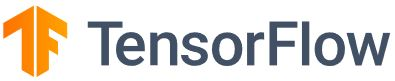





TensorFlow is an open source library developed at Google to support machine learning.  Its focus is on deep neural networks.  It was developed by Geoffrey Hinton, Jeff Dean (and many others!) starting in 2009 with an initial focus on speech recognition.  It's integrated with Kubernetes via the Kubeflow application.   Version 2.0 was released in 2019, along with TensorFlow Graphics (deep learning in graphics).  It's main applications now are around image capturing.

Google developed its 'Tensor processing unit' (TPU) - a chip designed precisely for TensorFlow.  These power Google Compute and when stacked into clusters of 64 TPUs can deliver 11.5 petaflops.   They are now available to the world on the Google Cloud Platform.

It's got a Python API (3.7+).   It also has bindings to C++, Go, Julia, and a host of others.

It's built on numpy and uses numpy.ndarray objects as base building blocks.  It has a numpy-friendly API, so you can work with tensors pretty much the same way you'd work with numpy arrays.  These links will get you started.

To install:  
$ conda install -c anaconda tensorflow 

https://www.tensorflow.org/guide/tf_numpy

https://www.tensorflow.org

**Keras** is an API that allows easy creation of training tasks across multiple GPUs, TPUs, or machines.  It handles a stack of single inputs and single outputs of tensors, sequentially processed.   It can be used for feature extraction with complex models.  It works well with Google Colab, a hosted Jupyter Notebook site.

https://www.tensorflow.org/guide/keras/sequential_model

Here's a bit of TensorFlow code from the official docs:


### PyTorch

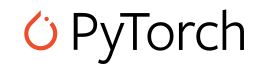



PyTorch is a Python (3.6-3.8) implemention of **Torch**.  Torch is a scientific computing framework and machine learning library. Torch itself uses a Lua wrapper over a C implementation of tensor arrays.   It has packages for loss functions (accuracy) and neural networks.  PyTorch is a Facebook project that took over development of Torch in 2020.

PyTorch supports automatic differentiation (calculation of high-dimension gradients) and a variety of optimization methods useful for building neural nets.   It is built on top of numpy and the pytorch.Tensor object is fundamentally a numpy.ndarray.   

PyTorch is CUDA-compatible (CUDA is an Nvidia platform/library for GPU-enabled parallel computing).

Several other applications wrap and extend PyTorch including **Tesla Autopilot**, Uber's **Pyro** application, and **PyTorch Lightning**.

It's supported on AWS, Google Cloud Platform, and Microsoft Azure.

To install:   
$ conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch 

You can learn more here:

https://pytorch.org/    

https://github.com/PyTorchLightning/pytorch-lightning

https://developer.nvidia.com/about-cuda

### Numba

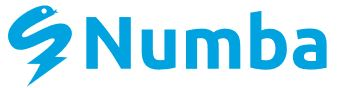



Numba is a 'just in time' compiler that optimizes, compiles, and parallelizes arbitrary Python (3.6-3.9) functions - essentially turning your code into machine language using the LLVM compiler infrastructure.  It's CUDA-compatible, so can attain silicon-level optimization whether you're using CPUs or GPUs.   It's built on numpy and mostly designed to optimize the performance of numpy.ndarray objects.

It saves the step of converting Python into C/C++ code - this happens at execution time, making the performance enhancements completely portable.   It's implemented using simple decorator functions like.

Here are some examples from the official docs:

In [ ]:
""" Parallelizes operations """
from numba import jit
@jit(nopython=True, parallel=True)
def simulator(out):
    # iterate loop in parallel
    for i in prange(out.shape[0]):
        out[i] = run_sim()

In [ ]:
""" Compile an arbitrary function """
from numba import jit
import random

SAMPLES = 1e5

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

%timeit -n1000 monte_carlo_pi(SAMPLES)

To install:  
$ conda install numba

These links will lead you to the docs and more examples.

http://numba.pydata.org/
https://llvm.org/

### PyMC3  

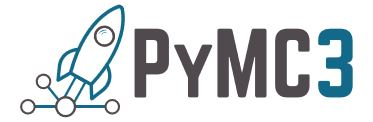



PyMC3 is used for Bayesian linear regression (and Bayesian inference, generally).   PyMC3 also contains a factor analysis module.  It specializes in simulation-based optimization of complex, high-dimension data spaces and can even handle data spaces that are defined parametrically at run-time.  PyMC3 also contains a factor analysis module

With PyMC3, you can implement a Marcov chain Monte Carlo with sampling algorithms NUTS (No-U-Turn sampler) and HCM (Hamiltonian Monte Carlo) that's self-tuning; that means you don't need prior knowledge of the distribution.

NUTS (No U-Turn Sampling) is a way to characterize an unknown distribution by drawing correlated samples that will converge in distribution to the unknown distribution.   It's written up by Matthew Hoffman (*J. Machine Learning Research, 2014*).   It eliminates the need to do a random walk of the distribution by calculating gradients and using them for the next target region to explore.

It's a tweak to Hamiltonian Monte Carlo approach that replaces random walk with simulation of Hamiltonian dynamics.  That's the bit that requires calculation of the gradient.   Gradient calculation requires that the user pick the step size ($\epsilon$) and the number of steps (L) - and getting these right can be really tough. 

Hamiltonian dynamics uses an auxialiary momentum variable $r_d$ for each model variable $\theta_d$.  It's based on partical dynamics where theta is a partical's position in D-dimensional space.   The momentum variable is the momentum in the dth dimension.  It factors in the position-dependent negative potential energy and the kinetic energy of the particle.

**Theano** is used under the hood for gradient calculation - it uses differentiation and can complile probabilistic problems to C on the fly.   Theano allows expressions to be defined as tensors, which are tightly integrated with numpy.ndarray objects.

To install:

$ conda install -c conda-forge pymc3

http://docs.pymc.io

http://docs.pymc.io/pymc-examples/examples/pymc3_howto/api_quickstart.html

Here is an example from the docs:

### Bokeh

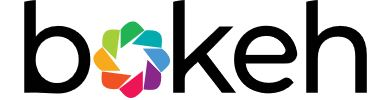



Bokeh is an all-purpose, interactive visualization library that wraps **matplotlib** and integrates tools like **Datashader** and **Holoviews**.   It's particularly useful for visual exploration of complex (or even streaming) data sets.   It's also useful for creating dashboards as "visual APIs" into your analytical work for presentation or collaboration purposes.

To install:

$ conda install -c anaconda bokeh 

https://bokeh.org/
https://docs.bokeh.org/en/latest/docs/user_guide.html
https://github.com/bokeh/bokeh

Here's an example from Bokeh's on-line tutorial:

In [45]:
# Standard imports 

from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [46]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

# Reset the plotting object
from bokeh.plotting import reset_output, output_notebook
try:
    reset_output()
    output_notebook()
    show(p)
except:
    output_notebook()
    show(p)

Loading BokehJS ...

In [47]:
%matplotlib inline
from bokeh.plotting import figure, output_file, save, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [4, 5, 5, 7, 2]

# set output to static HTML file
output_file(filename="custom_filename.html", title="Static HTML file")

# create a new plot with a specific size
p = figure(sizing_mode="stretch_width", max_width=500, plot_height=250)

# add a circle renderer
circle = p.circle(x, y, fill_color="red", size=15)

# save the results to a file
save(p)

try:
    reset_output()
    output_notebook()
    show(p)
except:
    output_notebook()
    show(p)

Loading BokehJS ...

Loading BokehJS ...

In [48]:
# Create and deploy interactive data applications

from IPython.display import IFrame
IFrame('https://demo.bokeh.org/sliders', width=900, height=500)

### Datashader

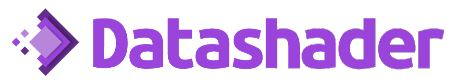



Datashader is a visualization tool designed specifically for big data.   It has built-in, automatic processes to capture data streams, compile rendering code using **Numba**, distribute processing load to available CPUs (with **Dask**) or GPUs (with **CUDA**).   This tool is truly amazing in that it can smoothly ingest many millions of datapoints and display them individually, with plenty of options for changing opacity, coloration, and resolution.

To install:

$ conda install -c anaconda datashader

Documents and tutorials can be found here.  The downloadable notebooks are excellent.

https://datashader.org/

https://datashader.org/user_guide/Trimesh.html

Here's a small example from the many provided in the official tutorial:

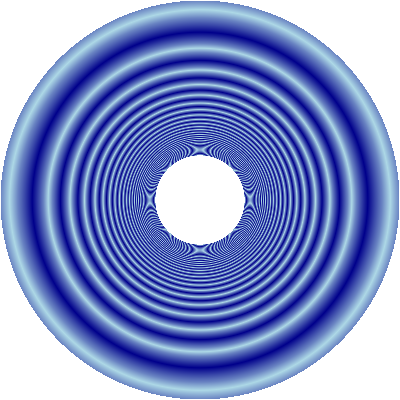

In [49]:
import numpy as np
import pandas as pd
import datashader as ds

import datashader.utils as du
import datashader.transfer_functions as tf
from scipy.spatial import Delaunay
rad = 0.05,1.0

def f(x,y):
    rsq = x**2+y**2
    return np.where(np.logical_or(rsq<rad[0],rsq>rad[1]), np.nan, np.sin(10/rsq))

n = 400

ls  = np.linspace(-1.0, 1.0, n)  # returns evenly spaced values within range
x,y = np.meshgrid(ls, ls)        # returns coordinate matrices from coordinate vectors 
img = f(x,y)

raster = tf.shade(tf.Image(img, name="Raster"))
raster

It's a bit beyond the scope of this class, but it's also possible to generate layered GIS maps based on shapes, shading, and a wireframe  all suppoorted by the Datashader support offered within **Holoviews**.  

Here's an example of an interactive rendering of Chesepeke and Deleware Bays.  By 'interactive' I mean you can zoom in and out to see individual pixels represent individual data points.   Each data point is available for viewing, even if there are millions of them.

You can download the project here and run it in a local notebook:

https://examples.pyviz.org/bay_trimesh/bay_trimesh.html

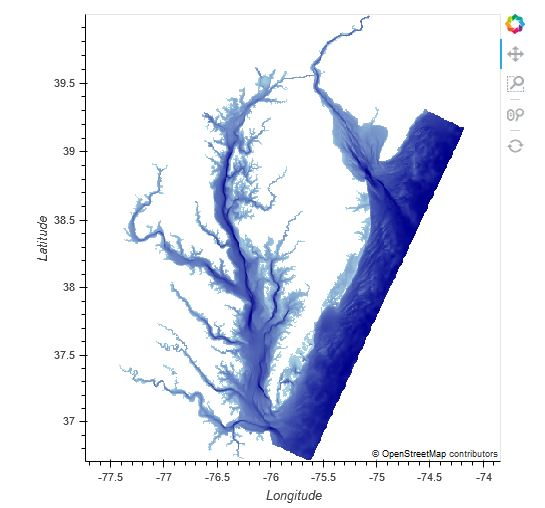